In [1]:
from mol2vec import features
from mol2vec.helpers import depict_identifier
from rdkit import Chem
from openbabel import openbabel
import os
import pandas as pd
import gensim as gs
import numpy as np

Leer CSVs del entrenamiento

In [2]:
for i in range(2, 9):
    if i == 2:
        df = pd.read_csv(f"out{i:02d}.csv")
    else:
        df = pd.concat([df, pd.read_csv(f"out{i:02d}.csv")])
print(df.head())
print(df.count())

FileNotFoundError: [Errno 2] No such file or directory: 'out02.csv'

Tomar una molécula y vectorizarla

In [27]:
df = pd.read_csv("out_df.csv")

molecula = Chem.MolFromSmiles('C1=CC=C(C=C1)N')
#molecula = Chem.MolFromSmiles('CC1CC(=O)N1')
sentence = features.mol2alt_sentence(molecula, 1)
model = gs.models.Word2Vec.load('model.plk')
vec = features.sentences2vec([sentence], model) #NOTA: mol2vec utiliza la suma de los vectores de las moleculas, no el promedio
vec = np.array(vec).astype(float)

[15:05:41] DEPRECATION WARNING: please use MorganGenerator


Comparar con las del CSV utilizando distancia euclidiana

In [28]:
vectors = []

for index, row in df.iterrows():
    vec2 = row[3:303]
    vec2 = np.array(vec2)
    vectors.extend([vec2])

    #Distancia euclidiana
"""    dist = np.linalg.norm(vec - vec2)
    df.at[index, 'distancia'] = dist"""

vectors = np.array(vectors)
vectors = vectors.astype(float)
euclidean_dists = np.linalg.norm(vectors - vec, axis=1)

Mostar las 10 más similares

In [30]:
df['distancia'] = euclidean_dists

print(df.sort_values(by='distancia').head(10)[['Smiles', 'distancia']])

         Smiles  distancia
7781  Nc1ccccc1   0.000003
7784  Nc1ccncc1   6.055506
7787  Nc1cccnc1   6.534659
7619  Nc1ccccn1   6.605411
7616  Oc1ccccc1   8.210181
7782  Fc1ccccc1   8.573946
7780  Cc1ccccc1   8.658355
7785  Fc1ccncc1  10.214332
7801  Fc1ccccn1  10.239458
7689  Oc1ccncc1  10.310338


Visualizar

[15:07:05] DEPRECATION WARNING: please use MorganGenerator
[15:07:05] The new font size 0.8 is below the current minimum (6).


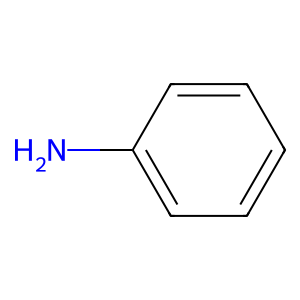

[15:07:06] DEPRECATION WARNING: please use MorganGenerator
[15:07:06] The new font size 0.8 is below the current minimum (6).


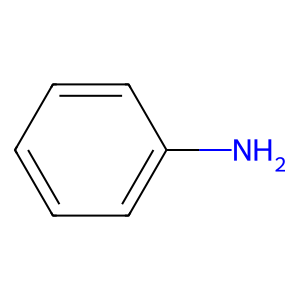

Nc1ccccc1
Nc1ccncc1
Nc1cccnc1
Nc1ccccn1
Oc1ccccc1
Fc1ccccc1
Cc1ccccc1
Fc1ccncc1
Fc1ccccn1
Oc1ccncc1


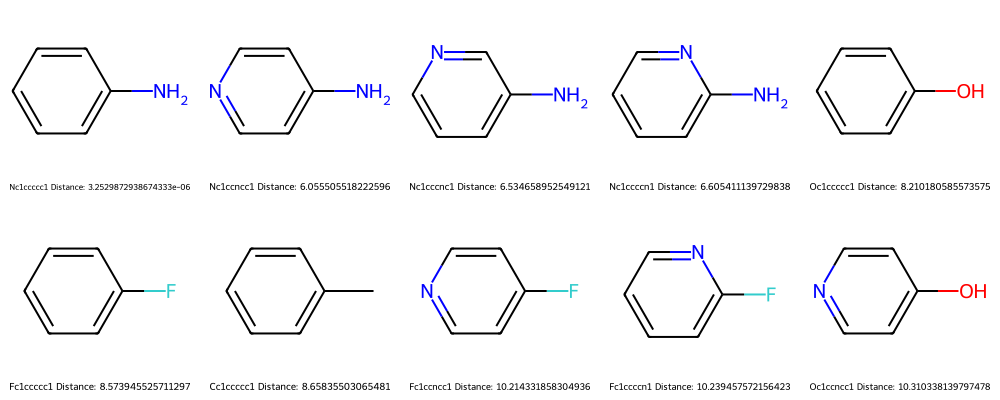

In [32]:
id = depict_identifier(molecula, 847950754, 1)
from IPython.display import SVG, display
display(id)

id = depict_identifier(Chem.MolFromSmiles(df.sort_values(by='distancia').head(10)['Smiles'].values[0]), 847950754, 1)
display(id)

from rdkit.Chem import Draw

top =[]
top_legends = []
for i in range(10):
    best_graph = df.sort_values('distancia').head(10)['Smiles'].values[i]
    print(best_graph)
    mol = Chem.MolFromSmiles(best_graph)
    top.append(mol)
    best_graph = best_graph + ' Distance: ' + str(df.sort_values('distancia').head(10)['distancia'].values[i])
    top_legends.append(best_graph)

#Draw.MolToImage(top[0])
Draw.MolsToGridImage(mols=top, molsPerRow=5, legends=top_legends)